In [ ]:
#logistic regression

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

import pandas as pd

In [23]:
data = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets_final\final_dataset.csv')
print(data.head())

   region   rank_mean  frequency  danceability  energy  key  loudness  mode  \
0       3   22.000000          4         0.685   0.644   10   -13.206     0   
1       3  100.461538        182         0.752   0.620    5    -5.536     1   
2       1   93.302548        314         0.748   0.627    7    -6.029     1   
3       2   77.031496        635         0.748   0.627    7    -6.029     1   
4       3  130.044329        767         0.748   0.627    7    -6.029     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.1550         0.302          0.000055    0.1140    0.808  164.919   
1       0.0509         0.309          0.000000    0.0750    0.962  117.399   
2       0.0639         0.131          0.000000    0.0852    0.524  120.963   
3       0.0639         0.131          0.000000    0.0852    0.524  120.963   
4       0.0639         0.131          0.000000    0.0852    0.524  120.963   

   duration_ms  time_signature  popular  
0       169379

In [ ]:
#feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
 #                  'acousticness', 'instrumentalness', 'liveness', 'valence', 
  #                 'tempo', 'duration_ms', 'time_signature']


#df = pd.DataFrame(data, columns=feature_names)
#df['region'] = data.region
#df['popular'] = data.popular
#df

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE



In [25]:
#seperate audio features and popular column. Column will be used as a target value
X = data.drop(['popular'], axis=1)  # Features
y = data['popular']  # Target

In [26]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
import os
import multiprocessing

# Get the number of logical cores (hyperthreading cores)
logical_cores = os.cpu_count()

# Get the number of physical cores
physical_cores = multiprocessing.cpu_count()

print(f"Logical cores: {logical_cores}")
print(f"Physical cores: {physical_cores}")


Logical cores: 20
Physical cores: 20


In [45]:
from sklearn.model_selection import cross_val_score

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the logistic regression model with scaled data
model = LogisticRegression(max_iter=2000, class_weight='balanced',n_jobs=16)
model.fit(X_resampled, y_resampled)

cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation

# Step 3: Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.79286561 0.79793081 0.79055625 0.79160316 0.79030992]
Mean Cross-Validation Score: 0.7926531492001908


In [29]:
#make predictions
y_pred = model.predict(X_test)

In [57]:
# Get predicted probabilities
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
print(y_pred_proba[:10])
print(len(y_pred_proba))

[2.15947108e-01 7.26464144e-01 1.11510745e-02 5.21164662e-01
 7.57634151e-06 6.38355069e-01 9.55728983e-01 6.70144638e-01
 2.22210245e-01 4.78974319e-05]
64953


In [48]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

Confusion Matrix:
[[55340     0]
 [ 9613     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     55340
           1       0.00      0.00      0.00      9613

    accuracy                           0.85     64953
   macro avg       0.43      0.50      0.46     64953
weighted avg       0.73      0.85      0.78     64953


Accuracy: 0.85


c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LENOVO\anaconda3\envs\DMML\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


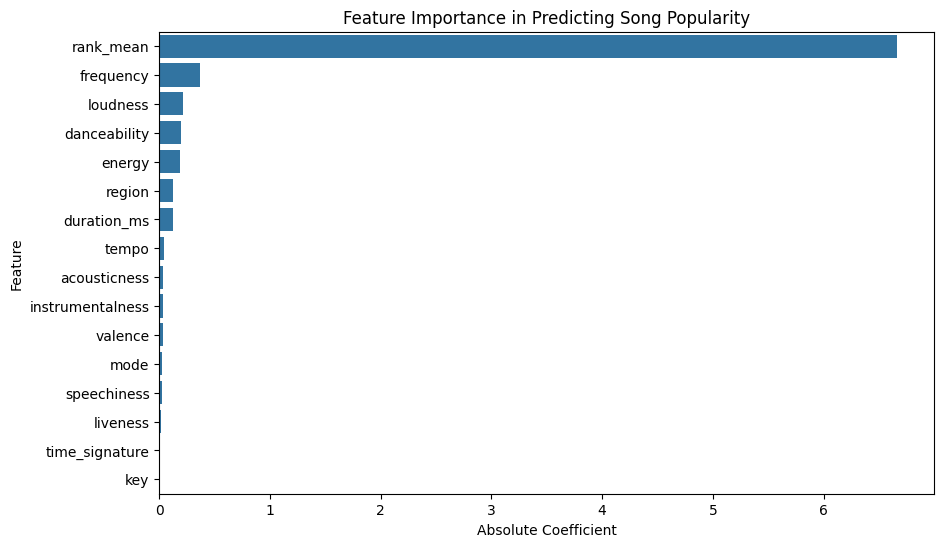

In [33]:
# Get the coefficients
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# Sort by absolute value of coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Song Popularity')
plt.show()

In [34]:
# Add predictions to the original dataset
data['Predicted Popularity'] = model.predict(X)

# Group by region and analyze the mean of each audio feature
region_analysis = data.groupby('region').mean()

print(region_analysis)

        rank_mean   frequency  danceability    energy       key  loudness  \
region                                                                      
0       77.279196   51.337591      0.686295  0.619734  5.206424 -7.608736   
1       76.333008   49.105086      0.603382  0.629306  5.294207 -6.861704   
2       69.784356   79.646751      0.661498  0.641239  5.287374 -7.342089   
3       71.238965  188.652069      0.663322  0.660444  5.356673 -6.707045   
4       75.454600   61.900429      0.642029  0.611241  5.288157 -7.634013   
5       79.722327   49.952433      0.657891  0.620176  5.185422 -6.990812   
6       78.484784   50.920149      0.642139  0.635878  5.316541 -7.348868   
7       67.062057   61.443718      0.647060  0.630660  5.223630 -7.050239   
8       71.296282   98.986811      0.622576  0.583866  5.239207 -7.393087   
9       71.917001   52.769791      0.649298  0.646239  5.306584 -7.021315   
10      81.339365   64.664749      0.669418  0.642748  5.338206 -7.263375   

In [46]:
# Example new song features
new_song_data = {
    'region': 5,
    'rank_mean': 0,  # Placeholder value,
    'frequency': 0,  # Placeholder value,
    'danceability': 0.7,
    'energy': 0.8,
    'key': 5,               
    'loudness': -5.0,
    'mode': 1,
    'speechiness': 0.05,
    'acousticness': 0.1,
    'instrumentalness': 0.0,
    'liveness': 0.2,
    'valence': 0.6,
    'tempo': 120,
    'duration_ms': 200000,
    'time_signature': 4
}

# Create a DataFrame
new_song_df = pd.DataFrame([new_song_data], columns=X.columns)

# Scale the new song data
new_song_scaled = scaler.transform(new_song_df)

# Convert the scaled data back to a DataFrame and assign feature names
new_song_scaled_df = pd.DataFrame(new_song_scaled, columns=X.columns)

# Make prediction
predicted_popularity = model.predict(new_song_scaled_df)

# Output the prediction
if predicted_popularity[0] == 1:
    print("The new song is predicted to be popular.")
else:
    print("The new song is predicted to be not popular.")


The new song is predicted to be popular.
